In [ ]:
from google.colab import files
uploaded = files.upload()


Saving deliveries.csv to deliveries.csv
Saving matches.csv to matches.csv
Saving orange_cap.csv to orange_cap.csv
Saving purple_cap.csv to purple_cap.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Display full columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

# Load data
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
orange_cap = pd.read_csv("orange_cap.csv")
purple_cap = pd.read_csv("purple_cap.csv")

# Preview data
print("✅ Matches:\n", matches.head(), "\n")
print("✅ Deliveries:\n", deliveries.head(), "\n")
print("✅ Orange Cap:\n", orange_cap.head(), "\n")
print("✅ Purple Cap:\n", purple_cap.head(), "\n")

# Step 3: Set Style and Sky Blue Color
sns.set(style="whitegrid")
sky_blue = "#87CEEB"  # Sky blue hex code
plt.figure(figsize=(16, 30))

✅ Matches:
    match_id           date                                          venue team1 team2   stage toss_winner toss_decision  first_ings_score  first_ings_wkts  second_ings_score  second_ings_wkts match_result match_winner wb_runs wb_wickets  balls_left player_of_the_match       top_scorer  highscore      best_bowling best_bowling_figure
0         1  March 22,2025                          Eden Gardens, Kolkata   KKR   RCB  League         RCB          Bowl             174.0              8.0              177.0               3.0    completed          RCB     NaN          7        22.0       Krunal Pandya      Virat Kohli       59.0     Krunal Pandya               3--29
1         2  March 23,2025  Rajiv Gandhi International Stadium, Hyderabad   SRH    RR  League          RR          Bowl             286.0              6.0              242.0               6.0    completed          SRH      44        NaN         0.0        Ishan Kishan     Ishan Kishan      106.0  Tushar Deshpande    

<Figure size 1600x3000 with 0 Axes>

<Figure size 1600x3000 with 0 Axes>

Text(0, 0.5, 'Batsman')

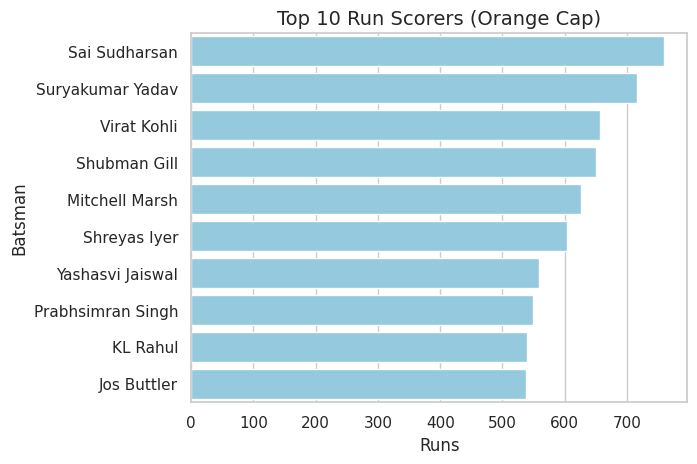

In [ ]:
# 1. Top 10 Run Scorers
plt.subplot(1, 1, 1)
top_batsmen = orange_cap.nlargest(10, "Runs")
sns.barplot(data=top_batsmen, y="Batsman", x="Runs", color=sky_blue)
plt.title("Top 10 Run Scorers (Orange Cap)", fontsize=14)
plt.xlabel("Runs")
plt.ylabel("Batsman")

Text(0, 0.5, 'Bowler')

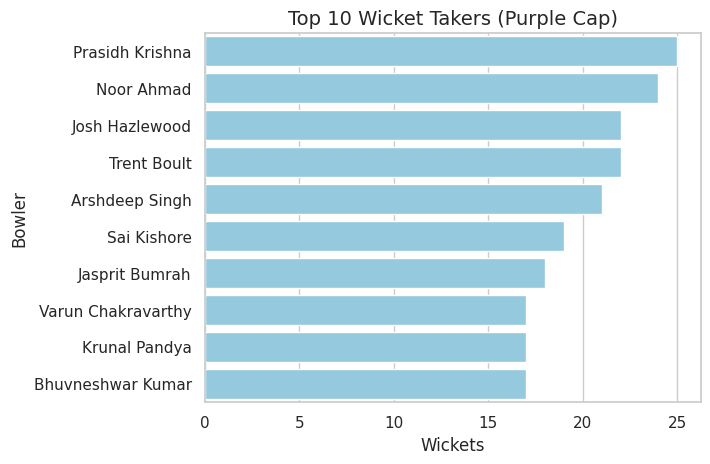

In [ ]:
plt.subplot(1, 1, 1)
top_bowlers = purple_cap.nlargest(10, "Wickets")
sns.barplot(data=top_bowlers, y="Bowler", x="Wickets", color=sky_blue)
plt.title("Top 10 Wicket Takers (Purple Cap)", fontsize=14)
plt.xlabel("Wickets")
plt.ylabel("Bowler")

Text(0, 0.5, 'Team')

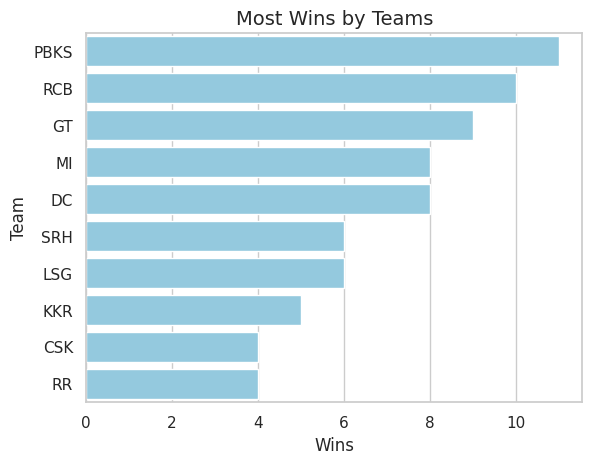

In [ ]:
plt.subplot(1, 1, 1)
win_counts = matches["match_winner"].value_counts().reset_index()
win_counts.columns = ["Team", "Wins"]
sns.barplot(data=win_counts, y="Team", x="Wins", color=sky_blue)
plt.title("Most Wins by Teams", fontsize=14)
plt.xlabel("Wins")
plt.ylabel("Team")

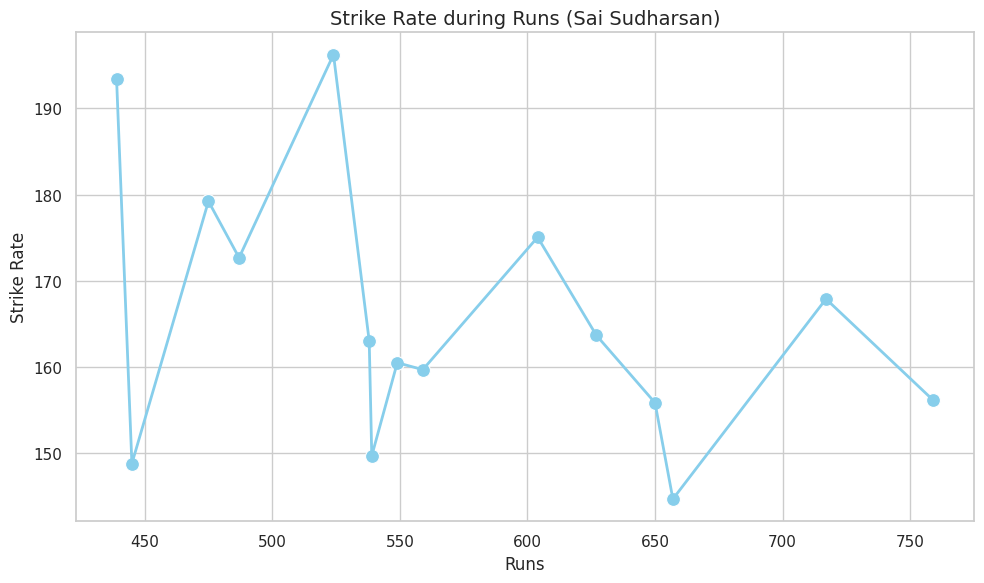

In [ ]:
plt.figure(figsize=(10, 6))

# Sort data by Runs to make the connecting line logical
sorted_data = orange_cap.sort_values(by="Runs")

# Line connecting the dots
sns.lineplot(data=sorted_data, x="Runs", y="Strike_rate", color=sky_blue, linewidth=2)

# Scatter plot
sns.scatterplot(data=sorted_data, x="Runs", y="Strike_rate", color=sky_blue, s=100)

plt.title("Strike Rate during Runs (Sai Sudharsan)", fontsize=14)
plt.xlabel("Runs")
plt.ylabel("Strike Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


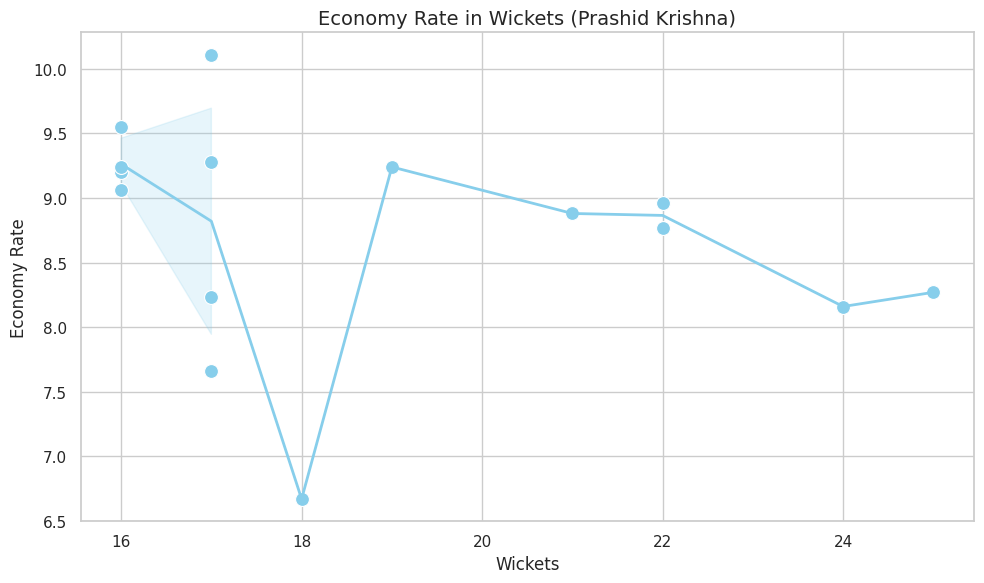

In [ ]:
plt.figure(figsize=(10, 6))

# Sort by Wickets to connect points in order
sorted_data = purple_cap.sort_values(by="Wickets")

# Line to connect dots
sns.lineplot(data=sorted_data, x="Wickets", y="Economy_rate", color=sky_blue, linewidth=2)

# Scatter plot on top
sns.scatterplot(data=sorted_data, x="Wickets", y="Economy_rate", color=sky_blue, s=100)

plt.title("Economy Rate in Wickets (Prashid Krishna)", fontsize=14)
plt.xlabel("Wickets")
plt.ylabel("Economy Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the total number of sixes hit by each team
sixes_by_team = deliveries[deliveries["runs_of_bat"] == 6].groupby("batting_team")["runs_of_bat"].count().reset_index(name="Sixes")

# Display the data
display(sixes_by_team)